# ÖDEV-2 EK ÇALIŞMA

# Soru-1

#DZD bir sistemin dürtü yanıtı iki şekilde bulunabilmektedir.
1-)  𝑦[𝑛]=𝑥[𝑛]∗ℎ[𝑛]
 
2-)  𝑌(𝑒^𝑗𝑤)=𝑋(𝑒^𝑗𝑤).𝐻(𝑒^𝑗𝑤)
 
Burada x[n] bilinmeden x[n] ve y[n] arasındaki bağıntı verildiğinden 2. yol tercih edilmeli;
öncelikle  𝑦[𝑛] − 1.2𝑦[𝑛 − 1] = 𝑥[𝑛] − 𝑥[𝑛 − 4] 
işareti fourier transformu alınmalı;
Y(e^jw)-1.2(e^-jw)Y(e^jw)=X(e^jm)-(e^-4jw)X(e^jw)
aynı olanları paranteze çekecek olursak;
Y(e^jw)(1-1.2e^-jw)=X(e^jm)(1-e^-4jw)
Y(e^jm)/X(e^jm) şeklinde yazacak olursak;
H(e^jm)=(1-e^-4jw)/(1-1.2e^-jw)
ifadesi elde edildi. H(e^jw) ifadesinin h(n) dürtü cevabının frekans ortamındak karşılığı olduğunu biliyoruz.
Bu ifadenin ters fourier dönüşümünü alırsak zaman domainindeki karşılığı bizim dürtü yanıtımız olacaktır;
𝐻(𝑒𝑗𝑤) ⟺ h[n]
elde edilen ifadeyi payda olarak ayırırsak;
𝐻(𝑒𝑗𝑤)= (1)/(1-1.2e^-jw) - (e^-4jw)/(1-1.2e^-jw)
ifadesi elde edilir.Ters Fourier alacak olursak;

h[n]=(1.2^n)*u[n]-1.2*(1^n-4)*u[n-4]

dürtü cevabı elde edilir.
Şimdi elde ettiğimiz bu dürtü cevabı üzerinden ilgili sorulara cevap verebiliriz


# a-)

Verilen sistemin kararlığını inceleyebilmek için giriş ve çıkışının sınırlı olması gerekmektedir. Bunu kısaca Bounded Input-Bounded Outuput olarak incelememiz lazım(BIBO).h[n] ifadesi için n = 0, 1, 2, 3, 4, ... için değerleri hesaplayabiliriz:

n = 0: h[0] = 1
n = 1: h[1] = 1.2
n = 2: h[2] = 1.44
n = 3: h[3] = 1.728
n = 4: h[4] = 1.728 - 1.2(1-4) = 5.928

ifadeye değerler verildiğinde 1.2^n katsayısından değerler hızla artmaktadır bu yüzden sistemin girişi bounded değildir bu yüzden çıkışıda bounded olamaz.

Sonuç olarak, verilen sistem kararsızdır.

# b-)

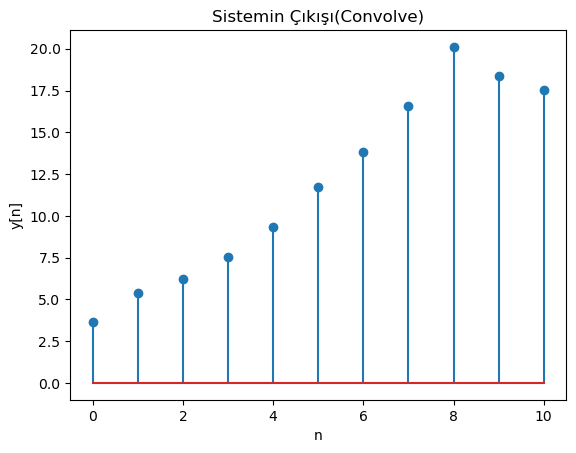

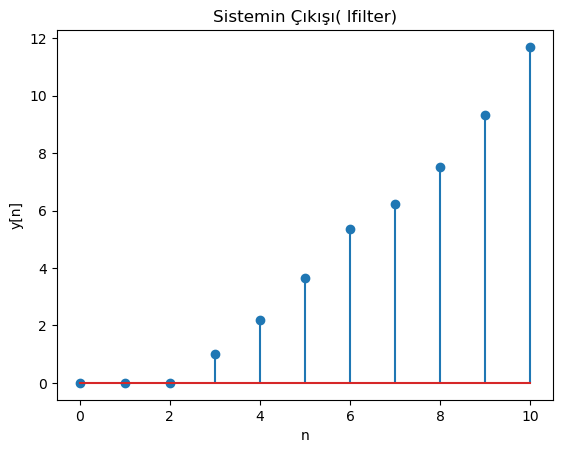

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve
from scipy.signal import lfilter


def step(n, k=0):
    return np.array([1 if i >= k else 0 for i in n])


n = np.arange(0, 11)# ilgili aralık

# h[n] işareti
h = (1.2**n)*step(n) - 1.2*step(n-4)

# x[n] işareti
x = step(n-3)

# sistem cevabı ve giriş işaretiyi convolve etme
y1 = convolve(h, x, mode='same')

# y[n] işareti grafiği
plt.stem(n, y1, use_line_collection=True)
plt.title('Sistemin Çıkışı(Convolve)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

y2 = lfilter(h, 1, x)

# y[n] işareti grafiği
plt.stem(n, y2, use_line_collection=True)
plt.title('Sistemin Çıkışı( lfilter)')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

"""
convolve fonksiyonu, giriş işaretini filtrenin yanıtıyla tüm aralık boyunca konvolüsyona sokar. 
Bu nedenle, hesaplamaların sonunda biraz daha uzun bir dizi üretir. 
mode='same' argümanı, sonucun orijinal giriş boyutunda kırpılmasını sağlar.

lfilter fonksiyonu, giriş işaretini filtrenin yanıtı ile ayrı ayrı çarpıp, ardından bunların toplamını alır.
Bu nedenle, hesaplamalar sırasında filtrenin yanıtı ile çarpılan önceki giriş işaretlerine de bağlıdır.

Bu nedenle, convolve ve lfilter fonksiyonları arasındaki farklılık nedeniyle iki grafik arasında farklılık görülebilir.
"""

# Soru-2

h2[n]=dirac(n-2) - dirac(n-4)
Bu sistemi verilen 3 farklı giriş işareti ile uygulandığında elde edilecek çıkış işaretlerini bulacağız

# a-)

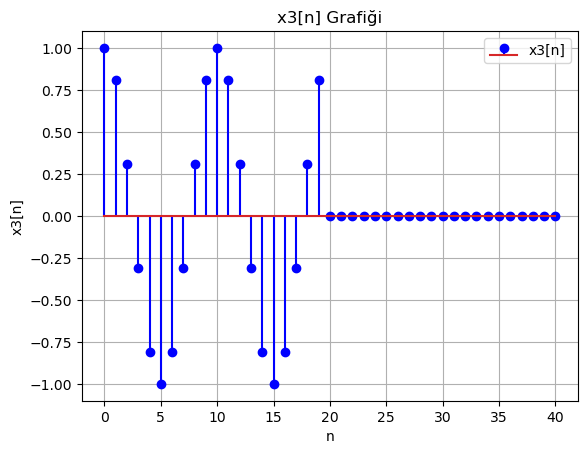

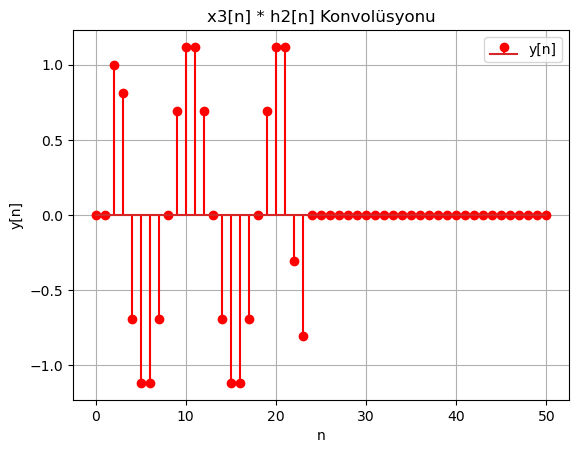

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# x3[n] işareti
n = np.arange(0, 41)
x3 = np.cos((np.pi/5)*n) * (np.heaviside(n, 1) - np.heaviside(n-20, 1))

# h2[n] dizisi
h2 = np.zeros(10)
h2[2] = 1
h2[4] = -1

# konvolüsyon işlemi
y = np.convolve(x3, h2)
y = np.append(y, 0)  # y dizisine 1 tane 0 ekleme

# x3[n] grafiği
plt.stem(n, x3, linefmt='blue', markerfmt='bo', label='x3[n]')
plt.xlabel('n')
plt.ylabel('x3[n]')
plt.title('x3[n] Grafiği')
plt.grid(True)
plt.legend()
plt.show()

"""
# h2[n] grafiği
n2 = np.arange(0, 10)
plt.stem(n2, h2, linefmt='green', markerfmt='go', label='h2[n]')
plt.xlabel('n')
plt.ylabel('h2[n]')
plt.title('h2[n] Grafiği')
plt.grid(True)
plt.legend()
plt.show()
"""
# y[n] grafiği
ny = np.arange(0, 51)
plt.stem(ny, y, linefmt='red', markerfmt='ro', label='y[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('x3[n] * h2[n] Konvolüsyonu')
plt.grid(True)
plt.legend()
plt.show()


# b-)

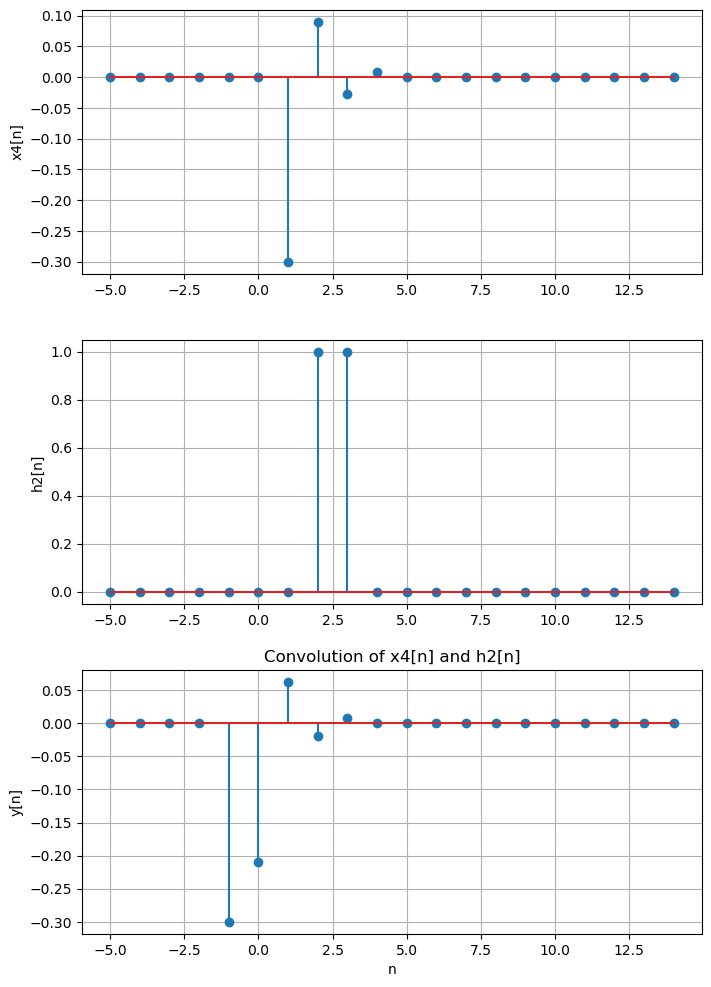

In [31]:
#x4[n]=x4[n]=((-0.3)^n)*(step(n-1) - step[n-5])
#h2[n]=dirac[n-2] - dirac[n-4]

import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-5, 15)

x4 = (-0.3) ** n * (np.heaviside(n-1, 1) - np.heaviside(n-5, 1))
h2 = np.heaviside(n-2, 1) - np.heaviside(n-4, 1)

fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].stem(n, x4)
axs[0].set_ylabel('x4[n]')
axs[0].grid()

axs[1].stem(n, h2)
axs[1].set_ylabel('h2[n]')
axs[1].grid()

y = np.convolve(x4, h2, mode='same')

axs[2].stem(n, y)
axs[2].set_xlabel('n')
axs[2].set_ylabel('y[n]')
axs[2].set_title('Convolution of x4[n] and h2[n]')
axs[2].grid()

plt.subplots_adjust(hspace=0.25)

plt.show()


# c-)

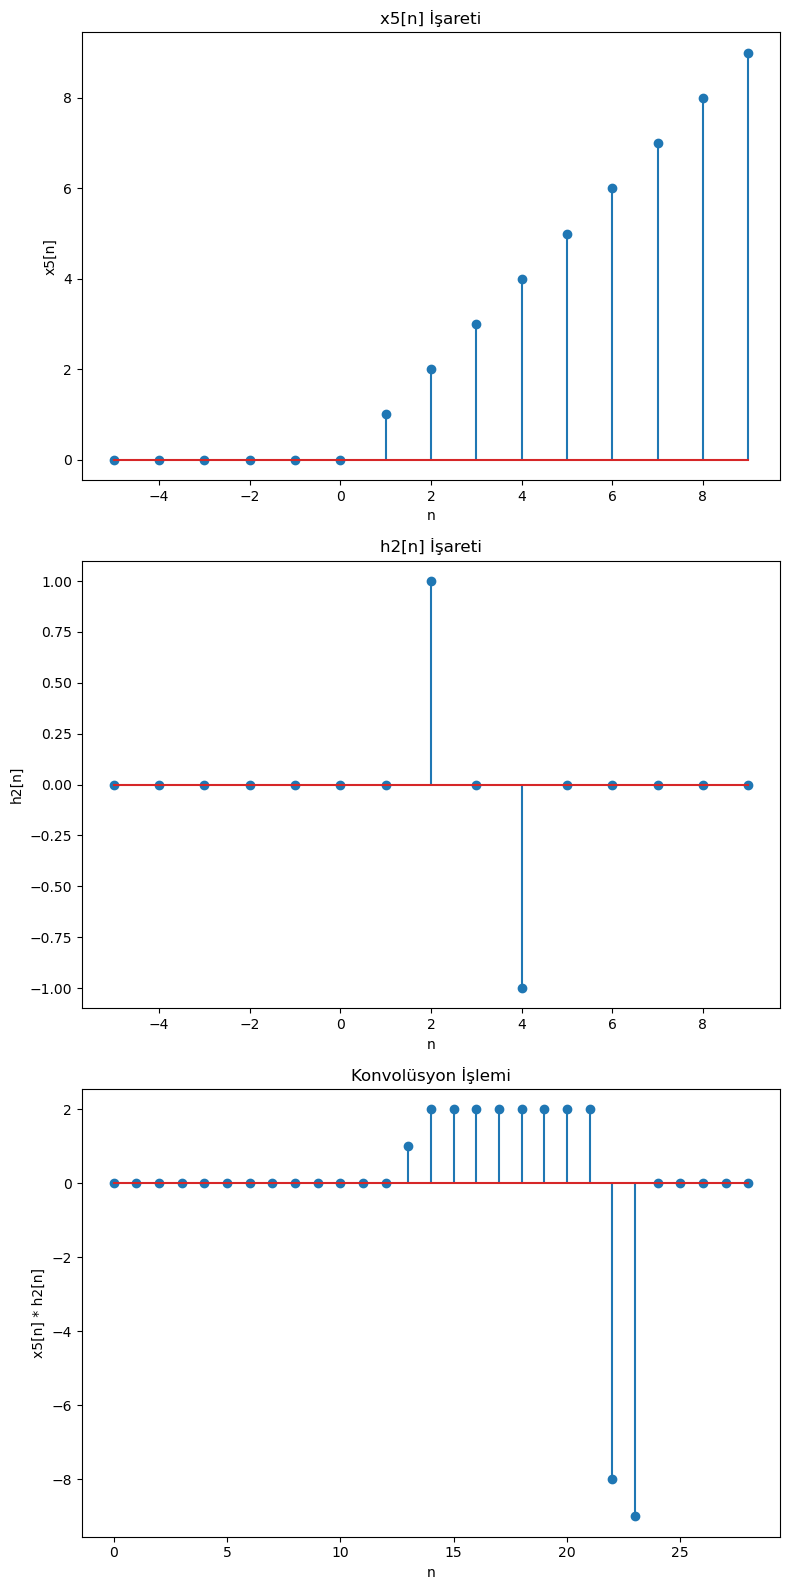

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# x5[n] işareti için
def x5(n):
    return n*np.heaviside(n, 1)

# h2[n] işareti için
def h2(n):
    return np.array([1 if i == 2 else (-1 if i == 4 else 0) for i in n])

# n değerleri için aralık tanımlama
n = np.arange(-5, 10)

# x5[n] işaretinin çizdirilmesi
plt.figure(figsize=(8, 16))
plt.subplot(311)
plt.stem(n, x5(n))
plt.xlabel('n')
plt.ylabel('x5[n]')
plt.title('x5[n] İşareti')

# h2[n] işaretinin çizdirilmesi
plt.subplot(312)
plt.stem(n, h2(n))
plt.xlabel('n')
plt.ylabel('h2[n]')
plt.title('h2[n] İşareti')

# x5[n] ve h2[n] işaretlerinin konvolüsyonu için
conv = np.convolve(x5(n), h2(n))

# konvolüsyon işaretinin çizdirilmesi
plt.subplot(313)
plt.stem(np.arange(len(conv)), conv)
plt.xlabel('n')
plt.ylabel('x5[n] * h2[n]')
plt.title('Konvolüsyon İşlemi')

# grafiğin gösterilmesi
plt.tight_layout()
plt.show()


# Soru-3

ödev yaparken matematiksel ve algoritmik açıdan birçok şey öğrendim. Matematiksel açıdan konvülasyon işlemi, 
iki sinyalin nasıl etkileşime girdiğini matematiksel olarak gösteren bir işlemdir. İki sinyalin konvülüsyonu, 
bir sinyalin diğer sinyalle kaydırılıp çarpılması ve sonrasında elde edilen sinyallerin toplamından oluşur. 
Bu işlemi teorik olarak her bir görev için ayrı ayrı hesapladım ve sonuçları inceledim. Ardından, Jupiter Notebook ortamında 
bu işlemleri gerçekleştirmek için gerekli kütüphaneleri ve fonksiyonları öğrendim ve sonuçları nasıl görebileceğimize dair bir 
araştırma yaptım. Bu araştırmalar sonucunda, işlemi Python programlama dili kullanarak gerçekleştirebileceğimi öğrendim ve 
gerekli kütüphaneleri ve fonksiyonları kullanarak işlemi gerçekleştirdim. Elde ettiğim grafiklerdeki değerleri teorik 
değerlerle karşılaştırdım ve sonuçların aynı olduğunu gözlemledim. Bu deneyimler, matematiksel ve algoritmik anlamda önemli 
bir katkı sağladı ve bu konuları daha iyi anlamama yardımcı oldu.